In [29]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
def load_all_results(results_dir='results/operators'):
    results = []
    for filename in os.listdir(results_dir):
        if filename.startswith('history_experiment_') and filename.endswith('.json'):
            filepath = os.path.join(results_dir, filename)
            with open(filepath, 'r') as f:
                history = json.load(f)
            results.append(history)
    return results


In [31]:
def process_results(results):
    best_fitness_list = []
    history_list = []
    
    for result in results:
        # Extrair informações de melhor fitness
        best_fitness_list.append({
            'experiment_id': result['experiment_id'],
            'repetition': result['repetition'],
            'best_train_v_measure': result['best_train_v_measure'],
            'best_test_v_measure': result['best_test_v_measure'],
            'best_individual': result['best_individual'],
            'config': result['config']
        })
        
        # Criar uma tupla ordenada da configuração excluindo 'experiment_id' e 'repetition'
        config_items = [(k, v) for k, v in result['config'].items() if k not in ['repetition']]
        config_tuple = tuple(sorted(config_items))
        
        # Adicionar ao histórico com identificação
        for generation_data in result['history']:
            history_record = generation_data.copy()
            history_record['experiment_id'] = result['experiment_id']
            history_record['repetition'] = result['repetition']
            history_record['config_tuple'] = config_tuple  # Armazenar como tupla sem 'repetition' e 'experiment_id'
            history_list.append(history_record)
    
    # Criar DataFrames
    df_best_fitness = pd.DataFrame(best_fitness_list)
    df_history = pd.DataFrame(history_list)
    
    return df_best_fitness, df_history


In [32]:
# Carregar todos os resultados
results = load_all_results('results/operators')

# Processar os resultados
df_best_fitness, df_history = process_results(results)
df_best_fitness

,experiment_id,repetition,best_train_v_measure,best_test_v_measure,best_individual,config
0,1,0,0.034600,0.029745,"operators['-'](operators['-'](x0, x5), operato...","{'population_size': 30, 'num_generations': 100..."
1,1,1,0.052668,0.092713,"operators['*'](operators['+'](x6, x8), operato...","{'population_size': 30, 'num_generations': 100..."
2,1,2,0.042717,0.048453,operators['*'](operators['-'](operators['+'](o...,"{'population_size': 30, 'num_generations': 100..."
3,1,4,0.028495,0.037999,operators['+'](operators['*'](operators['/'](x...,"{'population_size': 30, 'num_generations': 100..."
4,1,5,0.109219,0.039008,operators['+'](operators['+'](operators['*'](o...,"{'population_size': 30, 'num_generations': 100..."
5,1,6,0.065524,0.027241,operators['+'](operators['-'](operators['-'](o...,"{'population_size': 30, 'num_generations': 100..."
6,1,7,0.063374,0.039172,operators['-'](operators['+'](operators['*'](o...,"{'population_size': 30, 'num_generations': 100..."
7,1,8,0.036820,0.036220,operators['*'](operators['+'](operators['-'](x...,"{'population_size': 30, 'num_generations': 100..."
8,1,9,0.034179,0.019040,operators['/'](operators['-'](operators['+'](o...,"{'population_size': 30, 'num_generations': 100..."
9,2,0,0.025647,0.057700,"operators['+'](operators['+'](x9, x1), operato...","{'population_size': 30, 'num_generations': 100..."


In [33]:
df_history

,generation,best_fitness,min_fitness,average_fitness,experiment_id,repetition,config_tuple
0,0,0.034600,0.006312,0.013765,1,0,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
1,0,0.052668,0.005922,0.017883,1,1,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
2,0,0.042717,0.004874,0.013048,1,2,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
3,0,0.028495,0.005854,0.012132,1,4,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
4,0,0.109219,0.005787,0.015323,1,5,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
5,0,0.065524,0.005718,0.014102,1,6,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
6,0,0.063374,0.004459,0.015725,1,7,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
7,0,0.036820,0.003942,0.014695,1,8,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
8,0,0.034179,0.005273,0.013083,1,9,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
9,0,0.025647,0.005675,0.011393,2,0,"((crossover_prob, 0.6), (experiment_id, 2), (m..."


In [34]:
# Adicionar uma coluna 'config_tuple' ao DataFrame de melhores fitness
df_best_fitness['config_tuple'] = df_best_fitness['config'].apply(
    lambda x: tuple(sorted((k, v) for k, v in x.items() if k not in ['repetition']))
)

# Agrupar por configuração
grouped = df_best_fitness.groupby('config_tuple')

# Calcular estatísticas
stats = grouped.agg({
    'best_train_v_measure': ['mean', 'std', 'max'],
    'best_test_v_measure': ['mean', 'std', 'max']
}).reset_index()

# Ajustar os nomes das colunas
stats.columns = ['config_tuple', 
                 'train_mean', 'train_std', 'train_max',
                 'test_mean', 'test_std', 'test_max']

# Ordenar para encontrar as melhores configurações
stats_sorted_train = stats.sort_values('train_mean', ascending=False)
stats_sorted_test = stats.sort_values('test_mean', ascending=False)

# Exibir as melhores configurações
print("Melhores Configurações Baseadas no Fitness de Treino:")
print(stats_sorted_train.head())

print("\nMelhores Configurações Baseadas no Fitness de Teste:")
print(stats_sorted_test.head())


Melhores Configurações Baseadas no Fitness de Treino:
                                        config_tuple  train_mean  train_std  \
1  ((crossover_prob, 0.9), (experiment_id, 1), (m...    0.051955   0.025190   
0  ((crossover_prob, 0.6), (experiment_id, 2), (m...    0.040606   0.011064   
2  ((crossover_prob, 0.9), (experiment_id, 4), (m...    0.040095   0.009171   

   train_max  test_mean  test_std  test_max  
1   0.109219   0.041066  0.021116  0.092713  
0   0.063074   0.034918  0.015212  0.057700  
2   0.046580   0.042866  0.007979  0.048508  

Melhores Configurações Baseadas no Fitness de Teste:
                                        config_tuple  train_mean  train_std  \
2  ((crossover_prob, 0.9), (experiment_id, 4), (m...    0.040095   0.009171   
1  ((crossover_prob, 0.9), (experiment_id, 1), (m...    0.051955   0.025190   
0  ((crossover_prob, 0.6), (experiment_id, 2), (m...    0.040606   0.011064   

   train_max  test_mean  test_std  test_max  
2   0.046580   0.042866  0.0

In [35]:
# Melhor configuração de treino
best_config_train = stats_sorted_train.iloc[0]
best_config_tuple_train = best_config_train['config_tuple']
best_config_identifier_train = dict(best_config_tuple_train)

print("\nMelhor Configuração de Treino:")
print(best_config_identifier_train)
print("Melhor Fitness de Treino:", best_config_train['train_max'])
print("Média da Fitness de Treino:", best_config_train['train_mean'])
print("Desvio Padrão da Fitness de Treino:", best_config_train['train_std'])

# Melhor configuração de teste
best_config_test = stats_sorted_test.iloc[0]
best_config_tuple_test = best_config_test['config_tuple']
best_config_identifier_test = dict(best_config_tuple_test)

print("\nMelhor Configuração de Teste:")
print(best_config_identifier_test)
print("Melhor Fitness de Teste:", best_config_test['test_max'])
print("Média da Fitness de Teste:", best_config_test['test_mean'])
print("Desvio Padrão da Fitness de Teste:", best_config_test['test_std'])



Melhor Configuração de Treino:
{'crossover_prob': 0.9, 'experiment_id': 1, 'mutation_prob': 0.05, 'num_generations': 100, 'population_size': 30, 'tournament_size': 2}
Melhor Fitness de Treino: 0.10921920936836678
Média da Fitness de Treino: 0.051955190075894594
Desvio Padrão da Fitness de Treino: 0.025189731911947375

Melhor Configuração de Teste:
{'crossover_prob': 0.9, 'experiment_id': 4, 'mutation_prob': 0.05, 'num_generations': 500, 'population_size': 30, 'tournament_size': 2}
Melhor Fitness de Teste: 0.04850804948415985
Média da Fitness de Teste: 0.04286622334977358
Desvio Padrão da Fitness de Teste: 0.007978747035800033


In [36]:
def plot_fitness_evolution(df_history, config_tuple, config_identifier):
    # Filtrar os dados para a configuração específica
    print(config_tuple)
    df_config = df_history[df_history['config_tuple'] == config_tuple]
    
    if df_config.empty:
        print("Nenhum dado encontrado para a configuração especificada.")
        return
    
    # Agrupar por geração
    grouped = df_config.groupby('generation')
    
    # Calcular estatísticas
    stats = grouped.agg({
        'best_fitness': ['mean', 'min', 'max', 'std']
    }).reset_index()
    
    # Ajustar os nomes das colunas
    stats.columns = ['generation', 'mean_best_fitness', 'min_best_fitness', 'max_best_fitness', 'std_best_fitness']
    
    # Plotar
    plt.figure(figsize=(12, 6))
    plt.plot(stats['generation'], stats['mean_best_fitness'], label='Média da Fitness', color='blue')
    plt.plot(stats['generation'], stats['min_best_fitness'], label='Mínima Fitness', linestyle='--', color='green')
    plt.plot(stats['generation'], stats['max_best_fitness'], label='Máxima Fitness', linestyle='--', color='red')
    plt.fill_between(stats['generation'], 
                     stats['mean_best_fitness'] - stats['std_best_fitness'], 
                     stats['mean_best_fitness'] + stats['std_best_fitness'], 
                     color='gray', alpha=0.2, label='Desvio Padrão')
    
    plt.title(f'Evolução da Fitness - Configuração: {config_identifier}')
    plt.xlabel('Geração')
    plt.ylabel('Fitness')
    plt.legend()
    plt.grid(True)
    plt.show()


(('crossover_prob', 0.9), ('experiment_id', 1), ('mutation_prob', 0.05), ('num_generations', 100), ('population_size', 30), ('tournament_size', 2))


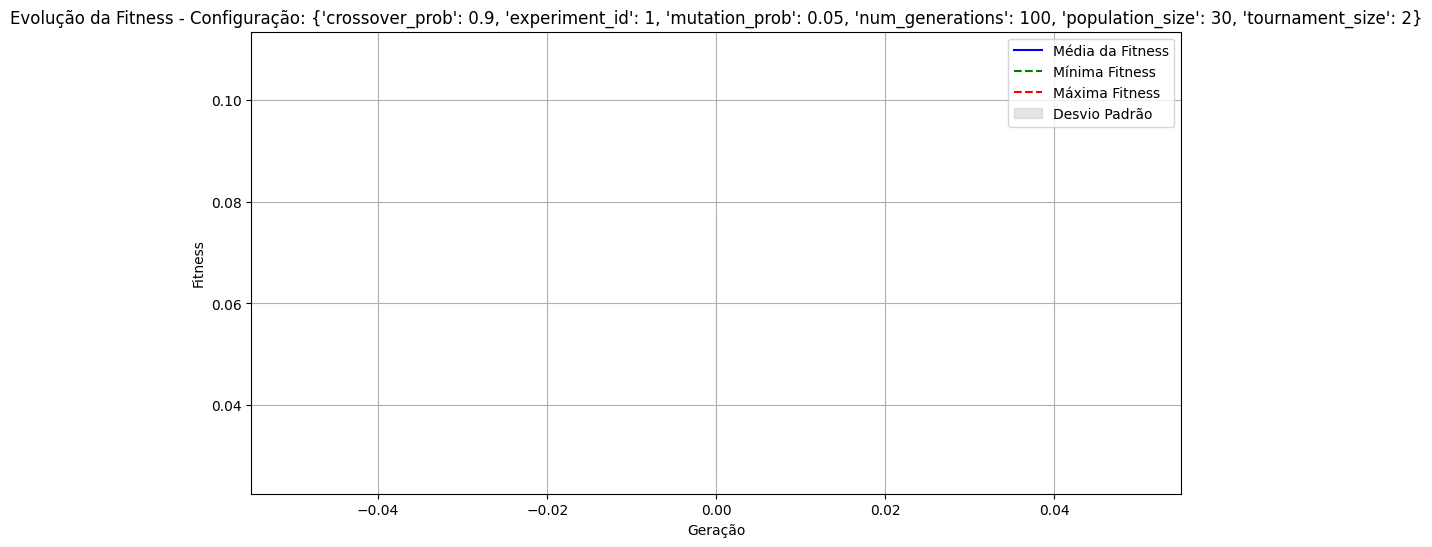

(('crossover_prob', 0.9), ('experiment_id', 4), ('mutation_prob', 0.05), ('num_generations', 500), ('population_size', 30), ('tournament_size', 2))


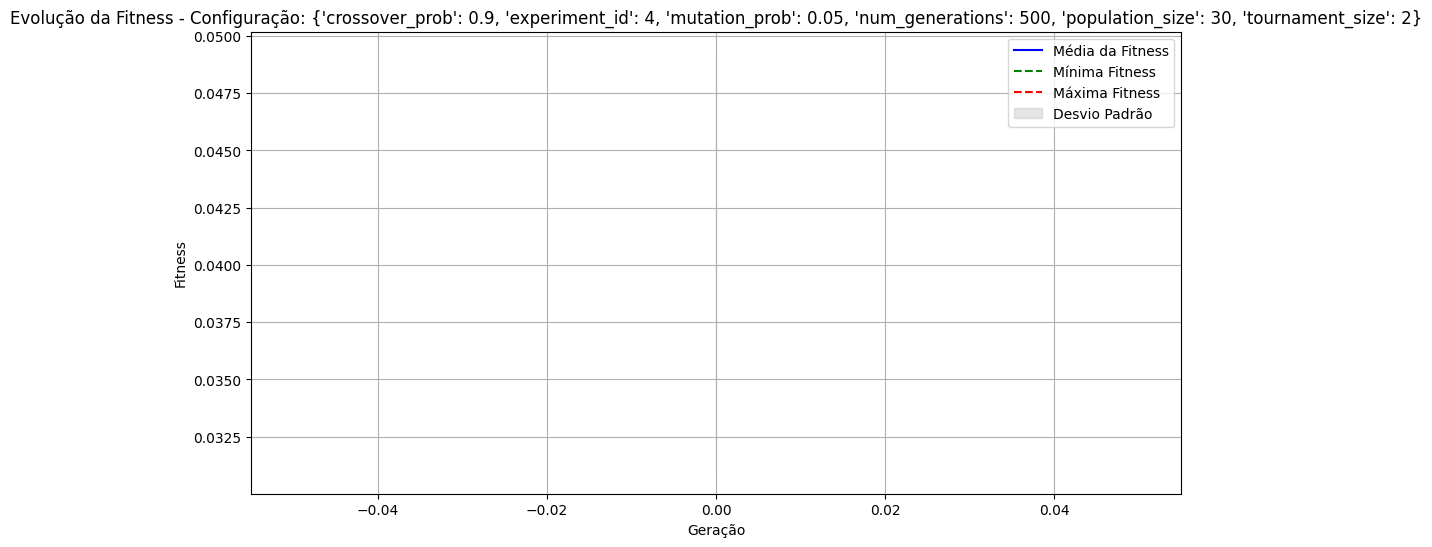

In [37]:
# Plotar para a melhor configuração de treino
plot_fitness_evolution(df_history, best_config_tuple_train, best_config_identifier_train)

# Plotar para a melhor configuração de teste
plot_fitness_evolution(df_history, best_config_tuple_test, best_config_identifier_test)
